In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
original_data =pd.read_csv(
    "applicant.csv",
    names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values='?')
original_data


,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


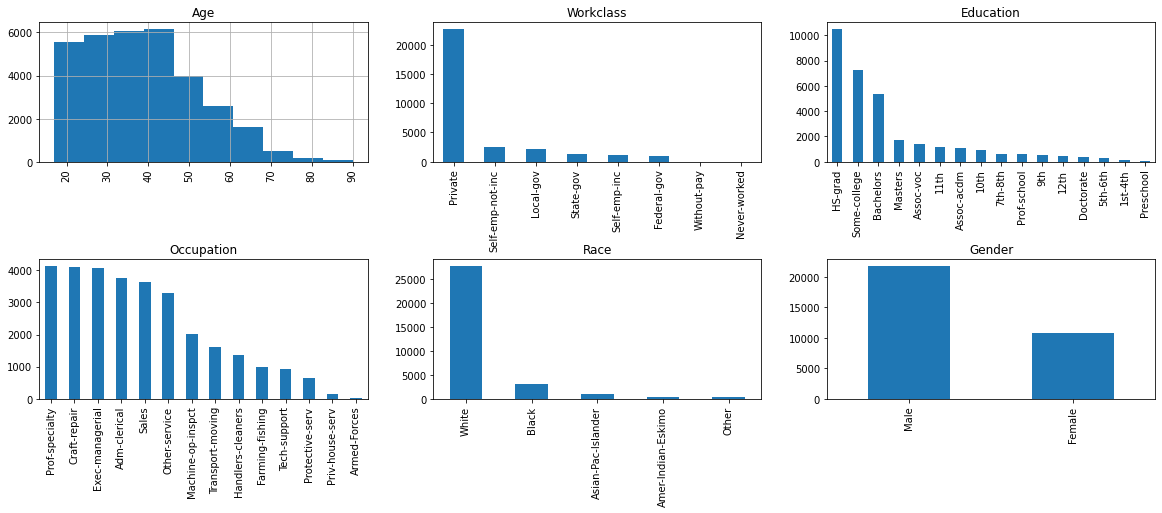

In [3]:
# Plot the graph
import matplotlib.pyplot as plt
import math
get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] ==np.object: 
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [4]:
#show data
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


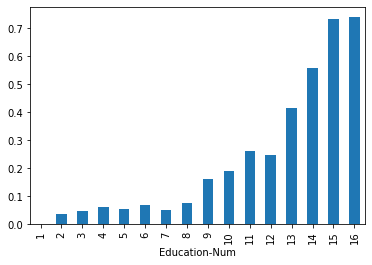

In [6]:
#show the graph
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()


In [7]:
#train test data
from sklearn.model_selection import train_test_split
X=original_data[['Education-Num','Occupation']]
Y=original_data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
#train the model using SVM classifier (SVC)
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7861200675571933


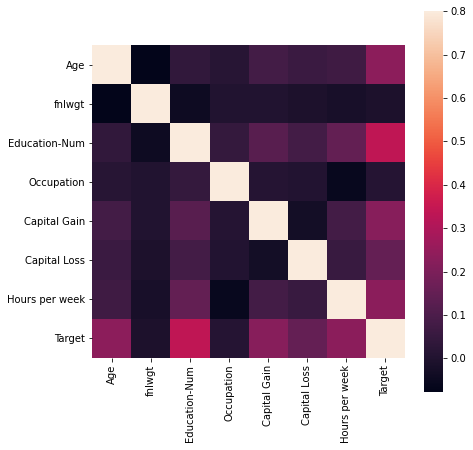

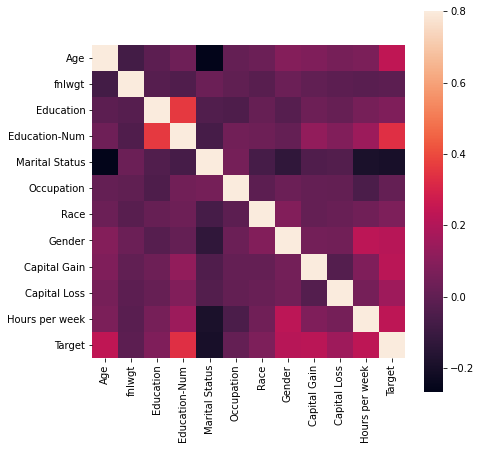

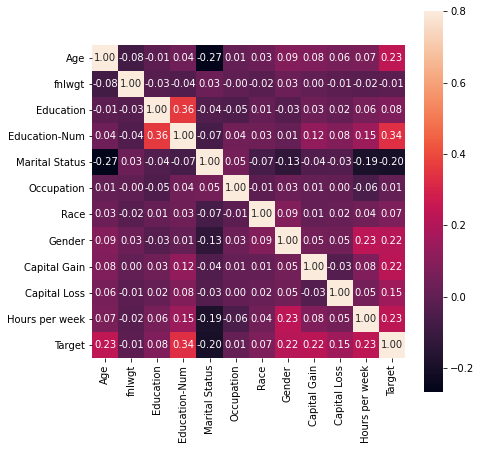

In [9]:
#seaborn for heatmap charts
import seaborn as sns
corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

original_data['Race']=le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status']=le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))
corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [10]:
#score the model
X=original_data[['Education-Num','Occupation','Age','Gender']]
Y=original_data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)


classifier =SVC(kernel='rbf', C=1.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792
0.7953324120988792
0.796714263780132
